# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# Smaller data set below
# lats = np.random.uniform(lat_range[0], lat_range[1], size=40)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=40)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

list_of_lat_long = []
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        list_of_lat_long.append({'lat':lat_lng[0],
                                'lng': lat_lng[1]})

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    print (str(city), str(i))
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    lat_lng = list_of_lat_long[i]
    # Create endpoint URL with each city
    city_url = url + "lat=" + str(lat_lng['lat']) + "&lon=" + str(lat_lng['lng']) + "&appid=" + weather_api_key + "&units=" + units

    print (city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        if ('country' in city_weather['sys']):
            city_country = city_weather['sys']['country']
        else:
            city_country = "Unknown"
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
punta arenas 0
http://api.openweathermap.org/data/2.5/weather?lat=-55.251733557344956&lon=-91.23779580538474&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 1 of Set 1 | punta arenas
cape town 1
http://api.openweathermap.org/data/2.5/weather?lat=-65.13491357768089&lon=-3.630525505590242&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 2 of Set 1 | cape town
meadow lake 2
http://api.openweathermap.org/data/2.5/weather?lat=56.15213110914382&lon=-107.44866322631074&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 3 of Set 1 | meadow lake
chuy 3
http://api.openweathermap.org/data/2.5/weather?lat=-62.12992072507573&lon=-24.600528757951878&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 4 of Set 1 | chuy
georgetown 4
http://api.openweathermap.org/data/2.5/weather?lat=-9.471032857884666&lon=-13.619966070398448&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&

aklavik 41
http://api.openweathermap.org/data/2.5/weather?lat=66.04928280247034&lon=-134.30217378930178&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 42 of Set 1 | aklavik
saint george 42
http://api.openweathermap.org/data/2.5/weather?lat=31.026720314719412&lon=-62.36156098469688&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 43 of Set 1 | saint george
te anau 43
http://api.openweathermap.org/data/2.5/weather?lat=-44.846708478626454&lon=157.64811508657402&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 44 of Set 1 | te anau
longyearbyen 44
http://api.openweathermap.org/data/2.5/weather?lat=86.73881303570107&lon=21.95315014882786&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 45 of Set 1 | longyearbyen
banes 45
http://api.openweathermap.org/data/2.5/weather?lat=21.224723432788508&lon=-75.32208527675881&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 46 of Set 1 | banes
vila 

saint-philippe 83
http://api.openweathermap.org/data/2.5/weather?lat=-41.91439734373484&lon=60.75449569827748&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 33 of Set 2 | saint-philippe
macklin 84
http://api.openweathermap.org/data/2.5/weather?lat=52.71660119498185&lon=-109.77424307040538&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 34 of Set 2 | macklin
canmore 85
http://api.openweathermap.org/data/2.5/weather?lat=51.20541842384466&lon=-115.43274031645649&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 35 of Set 2 | canmore
gardez 86
http://api.openweathermap.org/data/2.5/weather?lat=33.44818936073689&lon=69.21183926271758&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 36 of Set 2 | gardez
avera 87
http://api.openweathermap.org/data/2.5/weather?lat=-20.98506190794508&lon=-155.26529655402604&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 37 of Set 2 | avera
hobart 88
http

nivala 125
http://api.openweathermap.org/data/2.5/weather?lat=63.973588342331965&lon=25.792755700798807&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 25 of Set 3 | nivala
atuona 126
http://api.openweathermap.org/data/2.5/weather?lat=-9.108032698470083&lon=-133.3196332944022&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 26 of Set 3 | atuona
kalaleh 127
http://api.openweathermap.org/data/2.5/weather?lat=38.05555077588977&lon=56.25566850256479&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 27 of Set 3 | kalaleh
lesu 128
http://api.openweathermap.org/data/2.5/weather?lat=47.16588677641576&lon=24.760250581812357&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 28 of Set 3 | lesu
victoria 129
http://api.openweathermap.org/data/2.5/weather?lat=-8.917118399008956&lon=61.68714575501761&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 29 of Set 3 | victoria
yulara 130
http://api.openw

brae 167
http://api.openweathermap.org/data/2.5/weather?lat=65.53184970101492&lon=-1.8171593370919936&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 17 of Set 4 | brae
koslan 168
http://api.openweathermap.org/data/2.5/weather?lat=64.56511699522017&lon=50.042271987728185&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 18 of Set 4 | koslan
tsihombe 169
http://api.openweathermap.org/data/2.5/weather?lat=-50.18189817116821&lon=46.75765395738253&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 19 of Set 4 | tsihombe
farias brito 170
http://api.openweathermap.org/data/2.5/weather?lat=-7.043004581536749&lon=-39.57608643525114&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 20 of Set 4 | farias brito
gunjur 171
http://api.openweathermap.org/data/2.5/weather?lat=13.191880654611168&lon=-17.961828081155602&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 21 of Set 4 | gunjur
vidim 172
http

bolshaya orlovka 209
http://api.openweathermap.org/data/2.5/weather?lat=47.10879236576693&lon=41.01747686976179&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 9 of Set 5 | bolshaya orlovka
general roca 210
http://api.openweathermap.org/data/2.5/weather?lat=-39.09947831364428&lon=-65.74272735067012&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 10 of Set 5 | general roca
kununurra 211
http://api.openweathermap.org/data/2.5/weather?lat=-14.358975496457589&lon=125.69937211366289&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 11 of Set 5 | kununurra
boras 212
http://api.openweathermap.org/data/2.5/weather?lat=57.60731250246067&lon=12.903033016626125&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 12 of Set 5 | boras
xiantao 213
http://api.openweathermap.org/data/2.5/weather?lat=30.574996078896348&lon=113.42990177398747&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 13 of Set 5 

grindavik 250
http://api.openweathermap.org/data/2.5/weather?lat=55.29424932560187&lon=-29.000584374986772&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 0 of Set 6 | grindavik
mumford 251
http://api.openweathermap.org/data/2.5/weather?lat=0.33835860357346803&lon=1.0729526719352123&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 1 of Set 6 | mumford
mount gambier 252
http://api.openweathermap.org/data/2.5/weather?lat=-37.696802095911224&lon=139.94331280944579&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 2 of Set 6 | mount gambier
mnogovershinnyy 253
http://api.openweathermap.org/data/2.5/weather?lat=56.5707924378608&lon=141.22448251855837&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 3 of Set 6 | mnogovershinnyy
verkhnechusovskiye gorodki 254
http://api.openweathermap.org/data/2.5/weather?lat=58.1494139408434&lon=57.11636434675765&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing 

cagayan de tawi-tawi 291
http://api.openweathermap.org/data/2.5/weather?lat=7.0545111198759685&lon=119.47261028183567&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 41 of Set 6 | cagayan de tawi-tawi
revda 292
http://api.openweathermap.org/data/2.5/weather?lat=68.43125639591264&lon=34.076459865186536&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 42 of Set 6 | revda
ludvika 293
http://api.openweathermap.org/data/2.5/weather?lat=60.05670065453364&lon=14.5126355065658&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 43 of Set 6 | ludvika
college 294
http://api.openweathermap.org/data/2.5/weather?lat=67.87901458039354&lon=-152.42455193027004&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 44 of Set 6 | college
socorro 295
http://api.openweathermap.org/data/2.5/weather?lat=33.680052296742474&lon=-107.21203964675065&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 45 of Set 6 | soco

itarema 333
http://api.openweathermap.org/data/2.5/weather?lat=-2.627243466338669&lon=-39.98227001401969&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 33 of Set 7 | itarema
finschhafen 334
http://api.openweathermap.org/data/2.5/weather?lat=-5.657558253008077&lon=147.44802349363567&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 34 of Set 7 | finschhafen
morondava 335
http://api.openweathermap.org/data/2.5/weather?lat=-19.575411152509815&lon=41.24539772491315&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 35 of Set 7 | morondava
plastun 336
http://api.openweathermap.org/data/2.5/weather?lat=43.838941507200275&lon=137.22753286388104&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 36 of Set 7 | plastun
pirovskoye 337
http://api.openweathermap.org/data/2.5/weather?lat=57.863253596604295&lon=91.80471587826344&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 37 of Set 7 | pirovskoy

port-gentil 375
http://api.openweathermap.org/data/2.5/weather?lat=-4.815048427050286&lon=1.7563754351531315&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 25 of Set 8 | port-gentil
qaqortoq 376
http://api.openweathermap.org/data/2.5/weather?lat=61.43149192732241&lon=-45.55022574907201&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 26 of Set 8 | qaqortoq
tilichiki 377
http://api.openweathermap.org/data/2.5/weather?lat=58.822328322225644&lon=168.41615814769847&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 27 of Set 8 | tilichiki
urengoy 378
http://api.openweathermap.org/data/2.5/weather?lat=65.64519280600445&lon=77.79800123588996&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 28 of Set 8 | urengoy
lhokseumawe 379
http://api.openweathermap.org/data/2.5/weather?lat=5.152961240013738&lon=96.98918752301228&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 29 of Set 8 | lhokseumaw

ust-nera 417
http://api.openweathermap.org/data/2.5/weather?lat=63.51001541939786&lon=143.8689573131428&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 17 of Set 9 | ust-nera
presque isle 418
http://api.openweathermap.org/data/2.5/weather?lat=46.56593689468269&lon=-68.07575052487846&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 18 of Set 9 | presque isle
nurota 419
http://api.openweathermap.org/data/2.5/weather?lat=42.187004562691044&lon=65.57470122465608&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 19 of Set 9 | nurota
huarmey 420
http://api.openweathermap.org/data/2.5/weather?lat=-17.3768960945866&lon=-91.78698857130065&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 20 of Set 9 | huarmey
salitral 421
http://api.openweathermap.org/data/2.5/weather?lat=22.75318795407776&lon=-102.14895322731313&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 21 of Set 9 | salitral
ishinoma

souillac 459
http://api.openweathermap.org/data/2.5/weather?lat=-52.06250519580661&lon=72.08365344928887&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 9 of Set 10 | souillac
kabinda 460
http://api.openweathermap.org/data/2.5/weather?lat=-5.581176614391282&lon=24.813270718150306&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 10 of Set 10 | kabinda
lubana 461
http://api.openweathermap.org/data/2.5/weather?lat=56.831289351394986&lon=26.761143182188533&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 11 of Set 10 | lubana
newala 462
http://api.openweathermap.org/data/2.5/weather?lat=-11.028141970685226&lon=39.38419241880743&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 12 of Set 10 | newala
nogales 463
http://api.openweathermap.org/data/2.5/weather?lat=31.17793578274349&lon=-111.48418093580676&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 13 of Set 10 | nogales
porto walter 4

wuan 501
http://api.openweathermap.org/data/2.5/weather?lat=36.629243383852724&lon=114.22287429400018&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 1 of Set 11 | wuan
haines junction 502
http://api.openweathermap.org/data/2.5/weather?lat=63.9024285920778&lon=-141.9949300430352&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 2 of Set 11 | haines junction
chara 503
http://api.openweathermap.org/data/2.5/weather?lat=59.51340733555409&lon=118.23471096114173&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 3 of Set 11 | chara
mayumba 504
http://api.openweathermap.org/data/2.5/weather?lat=-6.602034416978228&lon=6.210956810306101&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 4 of Set 11 | mayumba
kinablangan 505
http://api.openweathermap.org/data/2.5/weather?lat=7.904929220761545&lon=127.81041477939124&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 5 of Set 11 | kinablangan
ada 50

chake chake 543
http://api.openweathermap.org/data/2.5/weather?lat=-5.458620081146989&lon=40.332522873114215&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 43 of Set 11 | chake chake
maniitsoq 544
http://api.openweathermap.org/data/2.5/weather?lat=62.30944004421346&lon=-56.66726676038468&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 44 of Set 11 | maniitsoq
bafoulabe 545
http://api.openweathermap.org/data/2.5/weather?lat=13.770168279127432&lon=-10.684080542914558&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 45 of Set 11 | bafoulabe
enfield 546
http://api.openweathermap.org/data/2.5/weather?lat=43.64177886091852&lon=-72.1765709556371&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 46 of Set 11 | enfield
sardarpur 547
http://api.openweathermap.org/data/2.5/weather?lat=22.574755354329866&lon=75.07800100643638&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 47 of Set 11 | sar

dicabisagan 584
http://api.openweathermap.org/data/2.5/weather?lat=16.974167501549957&lon=122.48941957827839&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 34 of Set 12 | dicabisagan
burica 585
http://api.openweathermap.org/data/2.5/weather?lat=6.365255698235416&lon=-83.46437152281027&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 35 of Set 12 | burica
korhogo 586
http://api.openweathermap.org/data/2.5/weather?lat=8.837050124894759&lon=-5.293629226641627&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 36 of Set 12 | korhogo
junin 587
http://api.openweathermap.org/data/2.5/weather?lat=-34.52435216834536&lon=-61.09886597825373&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 37 of Set 12 | junin
codrington 588
http://api.openweathermap.org/data/2.5/weather?lat=23.94698351008303&lon=-49.685590314545436&appid=9f9ab960cebe1096eb1d9caaa71ecd4c&units=Metric
Processing Record 38 of Set 12 | codrington
ko s

In [4]:
len(city_data)

595

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-55.2517,-91.2378,4.98,79,100,20.05,Unknown,1675894762
1,cape town,-65.1349,-3.6305,-0.14,92,100,16.24,Unknown,1675894763
2,meadow lake,56.1521,-107.4487,-10.65,86,25,2.81,CA,1675894763
3,chuy,-62.1299,-24.6005,-0.39,95,100,15.66,Unknown,1675894764
4,georgetown,-9.4710,-13.6200,25.56,67,66,5.38,Unknown,1675894764


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-18.4518,77.4996,25.11,76,31,9.93,Unknown,1675813065
1,bethel,55.0459,-168.0831,1.22,63,99,11.93,Unknown,1675813066
2,taolanaro,-47.9974,59.6199,6.99,83,99,9.17,Unknown,1675813066
3,tasiilaq,69.1407,-43.0619,-51.01,100,100,4.88,Unknown,1675813066
4,new norfolk,-51.6905,142.5366,6.58,71,98,8.33,Unknown,1675813067


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

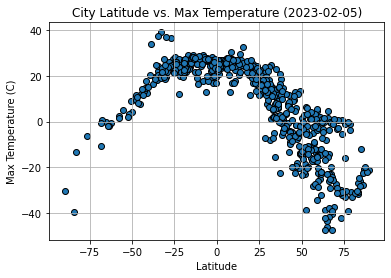

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

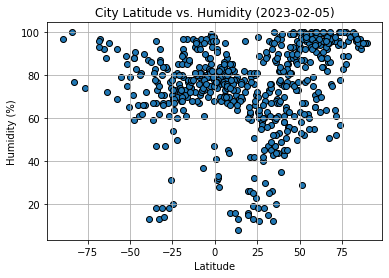

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

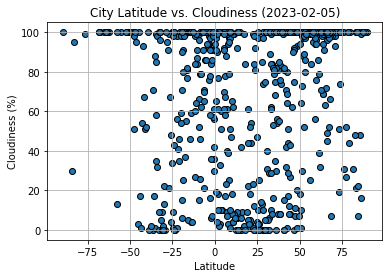

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

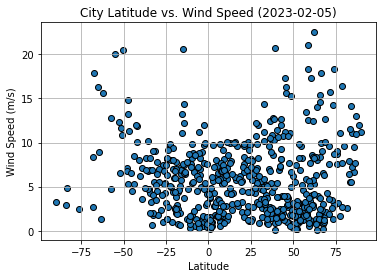

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots

def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,meadow lake,56.1521,-107.4487,-10.65,86,25,2.81,CA,1675894763
8,illoqqortoormiut,84.8235,-11.1966,-12.15,93,100,11.06,Unknown,1675894766
9,mys shmidta,89.6671,-177.0756,-21.35,95,100,11.20,Unknown,1675894766
11,agaro,7.8759,36.3879,13.15,45,3,1.27,ET,1675894767
12,nizhneyansk,85.7888,141.4375,-27.70,97,48,6.70,Unknown,1675894767


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-55.2517,-91.2378,4.98,79,100,20.05,Unknown,1675894762
1,cape town,-65.1349,-3.6305,-0.14,92,100,16.24,Unknown,1675894763
3,chuy,-62.1299,-24.6005,-0.39,95,100,15.66,Unknown,1675894764
4,georgetown,-9.4710,-13.6200,25.56,67,66,5.38,Unknown,1675894764
5,albany,-63.5812,113.8659,-1.78,72,100,1.32,Unknown,1675894764


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7423334643664817


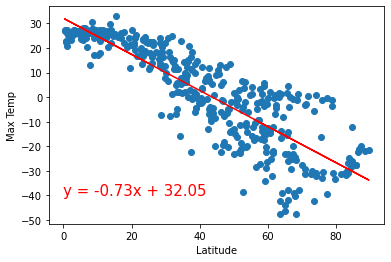

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.6204419726799899


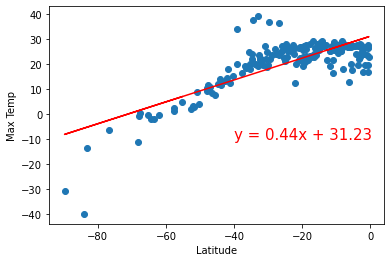

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis indicates that there is a negative correlation between Maximum Temperatures and Latitude in the Northern Hemisphere and a moderate positive correlation between Maximum Temperatures and Latitude in the Southern Hemisphere. This correlation is tighter in the Northern Hemisphere vs. the correlation in the Southern Hemisphere (the R-squared value for the Northern Hemisphere is .74 and .66 for the Southern Hemisphere). It also appears that the closer the city is to the equator, the better the correlation is.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.1851470287949334


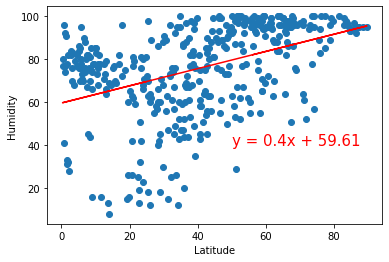

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0017010604866258404


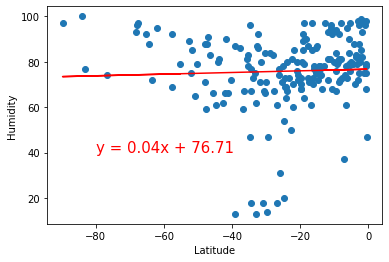

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There does not appear to a correlation between humidity levels and latitude in either the Northern or Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.11788811534746714


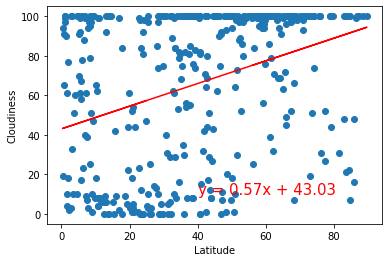

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 9.969279094808992e-05


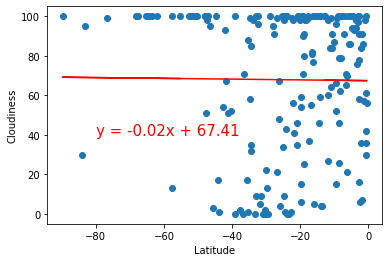

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** A low correlation appears between cloudiness and latitude in the Northern hemisphere; according to the R-squared value, it could be said that the closer to the equator a city is, there might be less chance of cloudiness. No correlation exists between cloudiness and latitude in the Southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.02350742793306957


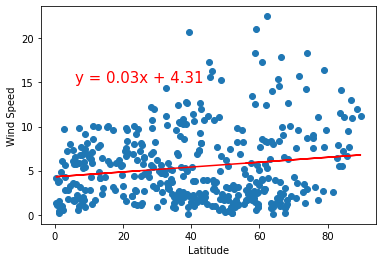

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.09068993977522888


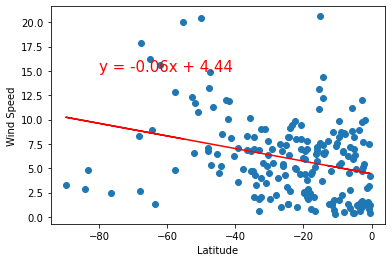

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is not a correlation between wind speed and latitude in the Northern Hemisphere. In the Southern Hemisphere, there appears to be a very, very small correlation between wind speed an latitude: the close a city is to the equator, the slower the wind speeds are.